In [1]:
import sys
import pandas as pd
import math
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
##from sklearn import metrics 
import numpy as np

<h2>Figure 1a</h2>

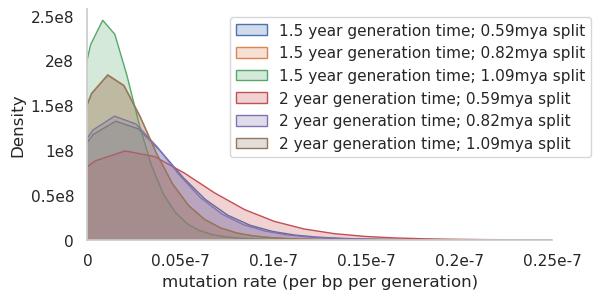

In [11]:
g1 = 1.5
g2 = 2
d1 = 590000
d2 = 820000
d3 = 1090000
df1 = pd.read_csv(r"mCalJa_demog_10kb_alignments_divergence_100kb.bed", 
                  sep='\t', names=['chrom','start','end','length', 'mutations', 'divergence'])
df1 = df1[df1.length>100]
df1['mu1'] = df1.divergence / (d1/g1)
df1['mu2'] = df1.divergence / (d2/g1)
df1['mu3'] = df1.divergence / (d3/g1)
df1['mu4'] = df1.divergence / (d1/g2)
df1['mu5'] = df1.divergence / (d2/g2)
df1['mu6'] = df1.divergence / (d3/g2)
sns.set(rc={'figure.figsize':(6,3),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1)

sns.kdeplot(np.array(df1['mu1']), fill=True, bw_method=0.75, label='1.5 year generation time; 0.59mya split')
sns.kdeplot(np.array(df1['mu2']), fill=True, bw_method=0.75, label='1.5 year generation time; 0.82mya split')
sns.kdeplot(np.array(df1['mu3']), fill=True, bw_method=0.75, label='1.5 year generation time; 1.09mya split')
sns.kdeplot(np.array(df1['mu4']), fill=True, bw_method=0.75, label='2 year generation time; 0.59mya split')
sns.kdeplot(np.array(df1['mu5']), fill=True, bw_method=0.75, label='2 year generation time; 0.82mya split')
sns.kdeplot(np.array(df1['mu6']), fill=True, bw_method=0.75, label='2 year generation time; 1.09mya split')
plt.xlabel('mutation rate (per bp per generation)')
plt.legend(bbox_to_anchor=(1.1, 1))
plt.xlim([0,0.25e-7])
plt.xticks([0, 0.05e-7, 0.1e-7, 0.15e-7, 0.2e-7, 0.25e-7], ['0', '0.05e-7', '0.1e-7', '0.15e-7', '0.2e-7', '0.25e-7'])
plt.yticks([0, 0.5e8, 1e8, 1.5e8, 2e8, 2.5e8], ['0', '0.5e8', '1e8', '1.5e8', '2e8', '2.5e8'])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

<h2>Figure 1b</h2>

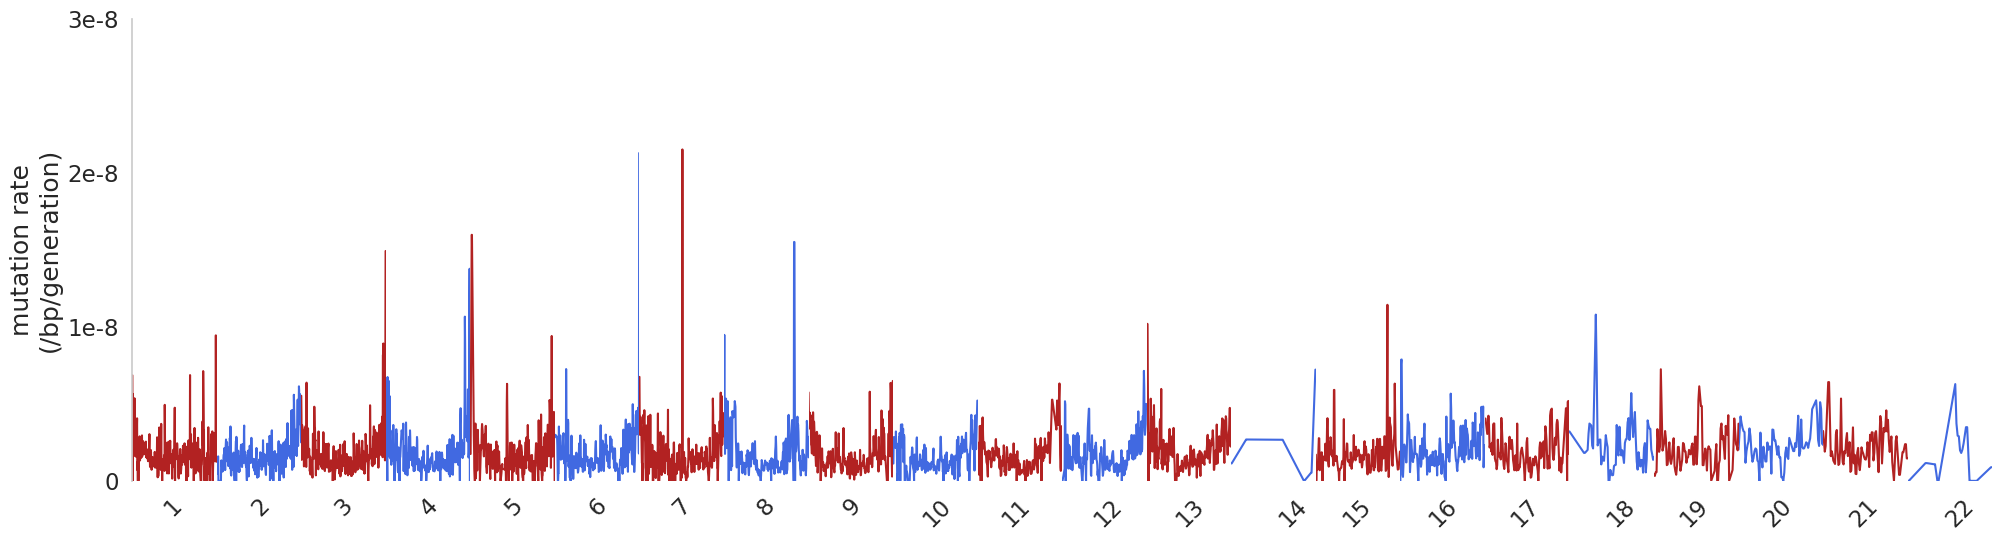

In [11]:
g1 = 1.5
g2 = 2
d1 = 590000
d2 = 820000
d3 = 1090000
df1 = pd.read_csv(r"mCalJa_demog_10kb_alignments_divergence_1mb.bed", sep='\t', 
                  names=['chrom','start','end','length', 'mutations', 'divergence'])
df1['mu'] = df1.divergence / (d2/g1)
df1 = df1[df1.length>100]
sns.set(rc={'figure.figsize':(24,6),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.5)
scaffolds = [x for x in range(42,64)] 
fig, axes = plt.subplots(1,22)
for c, ax in enumerate(axes.flat):
    tdf = df1[df1.chrom=='NC_0714'+str(scaffolds[c]) + '.1']
    if(c%2):
        col='royalblue'
    else:
        col='firebrick'
    ax.plot(tdf.start, tdf.mu, c=col)
    ax.set_ylim([0,3e-8])
    ax.set_xticks([tdf.start.quantile(0.5)])
    ax.set_xticklabels([str(scaffolds[c]-41)])
    if(scaffolds[c] != 1):
        ax.set_yticklabels('')
    ax.margins(0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    if(scaffolds[c]!=42):
        ax.spines['left'].set_visible(False)
        ax.set_yticks([0, 1e-8, 2e-8, 3e-8])
        ax.set_yticklabels(['', '', '', ''])
    else:
        ax.set_yticks([0, 1e-8, 2e-8, 3e-8,])
        ax.set_yticklabels(['0', '1e-8', '2e-8', '3e-8'])
        ax.set_ylabel('mutation rate\n(/bp/generation)')
    # Get x-axis labels
    labels = ax.get_xticklabels()
    ax.tick_params(axis='x', rotation=45)
plt.subplots_adjust(wspace=0, hspace=0)
